<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-7/XGBoost/XGB%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arya Fridayana Gastiadi
#1103210082
#Dataset : Melbourne Housing Dataset, Model : Random Forest, Decision Tree, XGBooster
#Dokumentasi ChatGPT :https://chat.openai.com/c/6f70ac87-b68e-4629-aef6-456088625d7e

## Memuat Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Step 1: Load melb_house.csv dataset
data = pd.read_csv('/content/sample_data/melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Cleaning Area

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

## Preprocessing

In [ ]:
# Step 2: Feature Engineering
# For simplicity, let's assume we have some features selected for the model
features = ['Rooms', 'Distance', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']

In [ ]:
# Remove rows with missing target, separate target from predictors
data.dropna(axis=0, subset=['Price'], inplace=True)
y = data.Price
X = data[features]

## Visualisasi Data

In [ ]:
# Step 2: Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Step 3: Calculate Pearson correlation coefficients
correlation_matrix = numeric_data.corr()

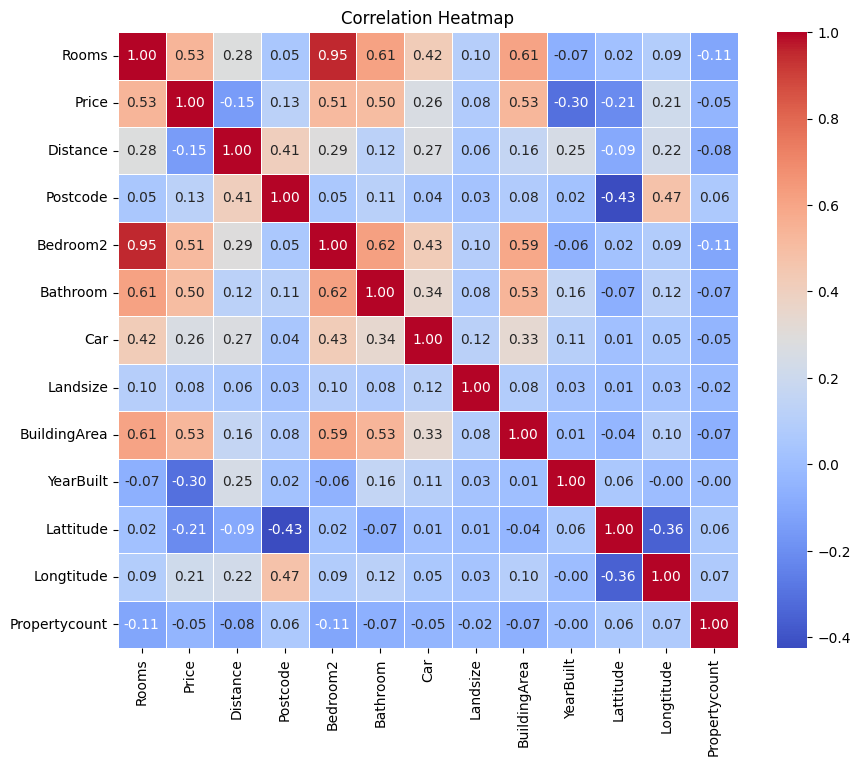

In [ ]:
# Display Pearson correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Train Data

In [ ]:
# Step 4: Split 70% for data train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [ ]:
# Step 5: Train models
# Random Forest
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Evaluasi model menggunakan MAE

In [ ]:
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("Random Forest MAE: ", rf_mae)
print("Decision Tree MAE: ", dt_mae)
print("XGBoost MAE: ", xgb_mae)

NameError: name 'X_test' is not defined

In [ ]:
# Step 7: Calculate Pearson correlation coefficients
correlation_matrix = numeric_data.corr()

# Display Pearson correlation coefficients
print("Pearson Correlation Coefficients:")
print(correlation_matrix)

Pearson Correlation Coefficients:
                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.533505  0.283885  0.051237  0.951793  0.613853   
Price          0.533505  1.000000 -0.148867  0.125539  0.514561  0.503922   
Distance       0.283885 -0.148867  1.000000  0.405729  0.290242  0.124530   
Postcode       0.051237  0.125539  0.405729  1.000000  0.053770  0.109804   
Bedroom2       0.951793  0.514561  0.290242  0.053770  1.000000  0.617751   
Bathroom       0.613853  0.503922  0.124530  0.109804  0.617751  1.000000   
Car            0.422526  0.261507  0.273615  0.043713  0.425726  0.340808   
Landsize       0.098755  0.081419  0.059369  0.025807  0.097172  0.076295   
BuildingArea   0.608215  0.530574  0.159603  0.078483  0.593000  0.534425   
YearBuilt     -0.068122 -0.304633  0.246291  0.024375 -0.056343  0.157820   
Lattitude      0.016049 -0.213574 -0.094494 -0.425172  0.021309 -0.072020   
Longtitude     0.088031  0.211760  0.22186